
# Project: Investigate a Dataset - [TMDB 5000 Movie Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), from the year 1960 to 2015.
the dataset columns are\
imdb_id               
 popularity            
 budget                
 revenue               
 original_title        
 cast                  
 homepage              
 director              
 tagline               
 keywords               
 overview              
 runtime               
 genres                
 production_companies  
 release_date          
 vote_count             
 vote_average          
 release_year          
 budget_adj            
 evenue_adj\
 I know that part of being data analyst is the ability to handle the csv files so I took the initiative,  I edited the cast column I separted it inot five columns by delimiter,  I only left the first one and deleted the others, I thought this would make it easier for me to handle the dataset.  


### Question(s) for Analysis
> are movies with higher vote count have higher profit? And what movie have the highest vote count in the dataset?\
> Does the budget of the movie affect its revenue and vote count? And what movie have the highest profit in the dataset?\
> When was the time period were the highest profits were made? and does the movies budget increases in recent years?\
> Exploring first leads and how many movies they participated in from the dataset? and the relation between first lead and vote count\
Exploring the movies genre and the relation between genres and profit



#### Loading the Dataset

In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#counter is a container that stores elements as dictionary keys, and their counts are stored as dictionary values.
from collections import Counter


In [244]:
df_movie= pd.read_csv('tmdb-movies.csv')

In [245]:
df_movie.set_index('id')

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08
140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09
168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson,NaN,Bruce Brown,NaN,surfer|surfboard|surfing,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00
20379,tt0060472,0.065543,0,0,Grand Prix,James Garner,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,car race|racing|formula 1,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00
39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy,NaN,Eldar Ryazanov,NaN,car|trolley|stealing car,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00


<a id='wrangling'></a>
## Data Wrangling

**in this section I will explore the dataset and then clean it**


### Exploring the dataset

In [246]:
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [247]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [248]:
df_movie.shape

(10866, 21)

In [249]:
df_movie.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [250]:
df_movie['release_year'].sort_values()

10172    1960
10141    1960
10142    1960
10143    1960
10144    1960
         ... 
417      2015
416      2015
415      2015
422      2015
0        2015
Name: release_year, Length: 10866, dtype: int64


### Data Cleaning
**in this section I will be looking for duplicates, misiing values, trimming the columns I won’t use**
 

#### Checking for duplicates

In [251]:
#check our data for duplicates
df_movie.duplicated().sum()

1

In [252]:
#remove duplicates
df_movie.drop_duplicates(inplace=True)

In [253]:
#confirm duplicates removal
df_movie.duplicated().sum()

0

#### Checking for duplicates and deleting the found duplicates then confirming it was deleted

#### Removiing the columns I won’t use 

In [254]:
#removing the columns that I will not use 
df_movie.drop(['imdb_id','homepage','director','tagline','keywords','overview','production_companies', 'popularity'], axis=1, inplace=True)
#confirm droping columns
df_movie.head()

,id,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,190000000,1506249360,Furious 7,Vin Diesel,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


#### Chicking for missing values and dropping it

In [255]:
#finding missing values
df_movie.isnull().sum()

id                 0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [256]:
#droping missing values
df_movie.dropna(inplace=True)
#confirming 
df_movie.isnull().sum()

id                0
budget            0
revenue           0
original_title    0
cast              0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [257]:
df_movie.shape

(10767, 13)

#### Renaming the cast column and adding new column names profit

In [258]:
#rename the column cast to first lead
df_movie.rename(columns={'cast':'fisrt_lead'}, inplace=True)
df_movie.head(1)

,id,budget,revenue,original_title,fisrt_lead,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09


In [259]:
#add new column called profit
profit_movie= df_movie['revenue_adj'] - df_movie['budget_adj']

In [260]:
df_movie['profit']=profit_movie
df_movie.head()

,id,budget,revenue,original_title,fisrt_lead,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,262500,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,168259,190000000,1506249360,Furious 7,Vin Diesel,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


I changed the column named cast to first lead, then added a column named profit by subtracting the budget from the revenue 

<a id='eda'></a>
## Exploratory Data Analysis



### Are movies with higher vote count have higher profit?And what movie have the highest vote count in the dataset?

In [261]:
# Exploring vote count
df_movie['vote_count'].describe()

count    10767.000000
mean       219.137364
std        577.964702
min         10.000000
25%         17.000000
50%         39.000000
75%        147.000000
max       9767.000000
Name: vote_count, dtype: float64

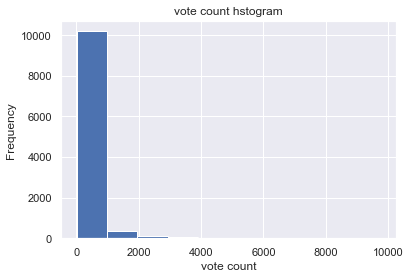

In [262]:
# Exploring vote count
df_movie.vote_count.hist()
plt.title('vote count hstogram')
plt.xlabel('vote count')
plt.ylabel('Frequency ');

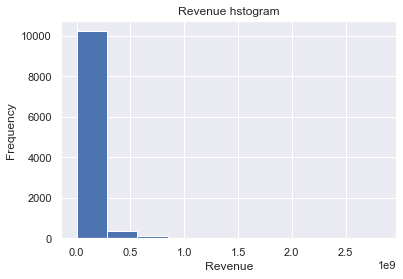

In [263]:
# Exploring revenue
df_movie.revenue_adj.hist()
plt.title('Revenue hstogram')
plt.xlabel('Revenue')
plt.ylabel('Frequency ');

### Top 30 movies according to vote count

In [264]:
#top 30 movies according to vote count
vote = df_movie.sort_values('vote_count', ascending=False)
top_30=vote.loc[:,['original_title','vote_count','fisrt_lead','release_year','profit']]
top_30.head(30)

,original_title,vote_count,fisrt_lead,release_year,profit
1919,Inception,9767,Leonardo DiCaprio,2010,6.655000e+08
4361,The Avengers,8903,Robert Downey Jr.,2012,1.234248e+09
1386,Avatar,8458,Sam Worthington,2009,2.586237e+09
2875,The Dark Knight,8432,Christian Bale,2008,8.273675e+08
4364,Django Unchained,7375,Jamie Foxx,2012,3.090166e+08
4382,The Hunger Games,7080,Jennifer Lawrence,2012,5.852426e+08
5425,Iron Man 3,6882,Robert Downey Jr.,2013,9.504857e+08
4363,The Dark Knight Rises,6723,Christian Bale,2012,7.892767e+08
629,Interstellar,6498,Matthew McConaughey,2014,4.207106e+08
4367,The Hobbit: An Unexpected Journey,6417,Ian McKellen,2012,7.284573e+08


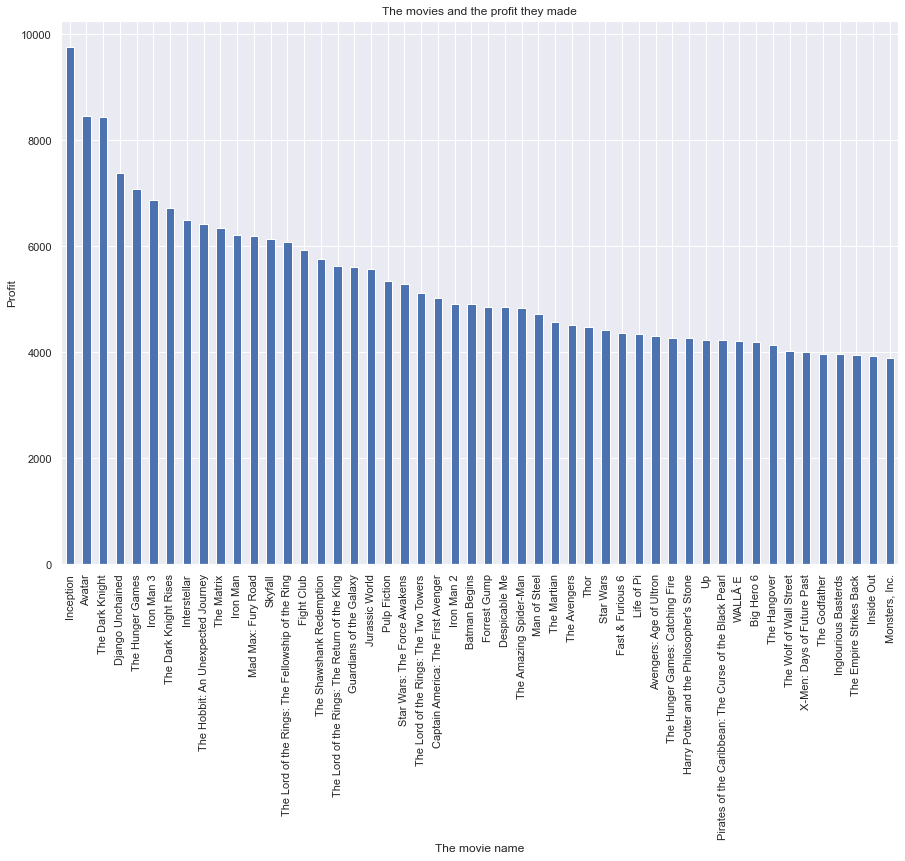

In [265]:
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby('original_title')['vote_count'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.title('The movies and the profit they made')
plt.xlabel('The movie name')
plt.ylabel('Profit');

The movie with the highest vote count in the dataset is Inception

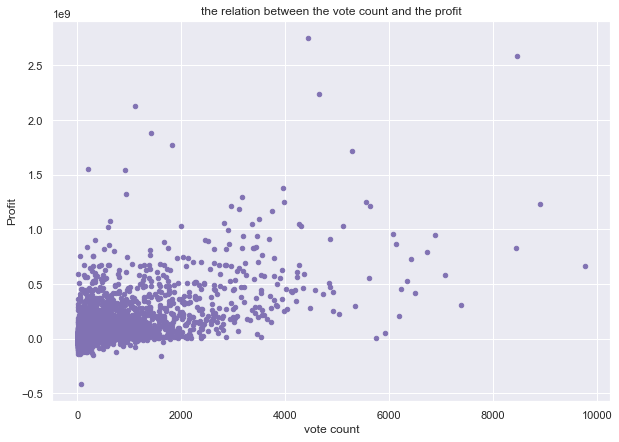

In [266]:
#the relation between the vote count and the profit
top_30.plot(x='vote_count' ,y='profit', kind='scatter', color= 'm',figsize=(10,7));
plt.title('the relation between the vote count and the profit')
plt.xlabel('vote count')
plt.ylabel('Profit');

The vote count and the profit have a positive correlation

### Does the budget of the movie affect its revenue and vote count?And what movie have the highest profit in the dataset?

In [267]:
# Exploring the budjet
df_movie['budget_adj'].describe()


count    1.076700e+04
mean     1.770705e+07
std      3.442339e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.103337e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

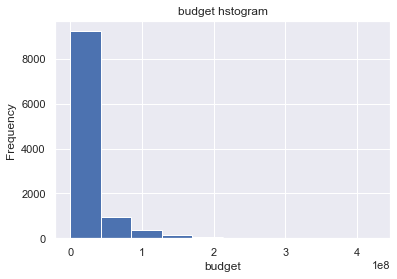

In [268]:
df_movie['budget_adj'].hist()
plt.title('budget hstogram')
plt.xlabel('budget')
plt.ylabel('Frequency ');

In [269]:
# Exploring the budjet and revenue
df_bj = df_movie.groupby('budget_adj').revenue_adj.mean()
df_bj

budget_adj
0.000000e+00    5.325402e+06
9.210911e-01    0.000000e+00
9.693980e-01    1.335831e+03
1.012787e+00    0.000000e+00
1.309053e+00    1.309053e+02
                    ...     
2.716921e+08    2.506406e+09
2.920507e+08    4.230205e+08
3.155006e+08    1.010654e+09
3.683713e+08    9.904175e+08
4.250000e+08    1.108757e+07
Name: revenue_adj, Length: 2606, dtype: float64

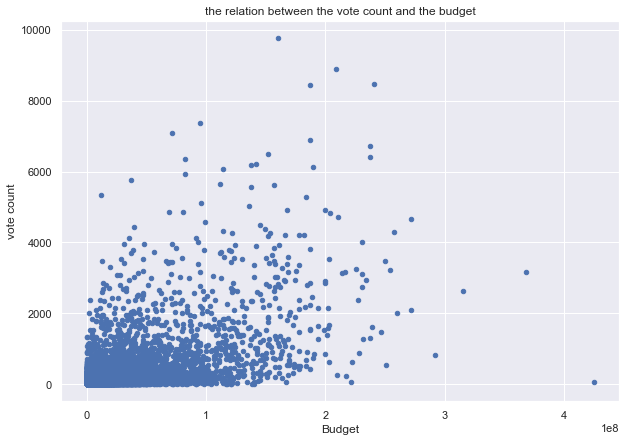

In [270]:
#Plotting the relation between the vote count and the budget
df_movie.plot(x='budget_adj' ,y='vote_count', kind='scatter',color='b', figsize=(10,7));
plt.title('the relation between the vote count and the budget')
plt.xlabel('Budget')
plt.ylabel('vote count');

The budget and the vote count have positive correlation

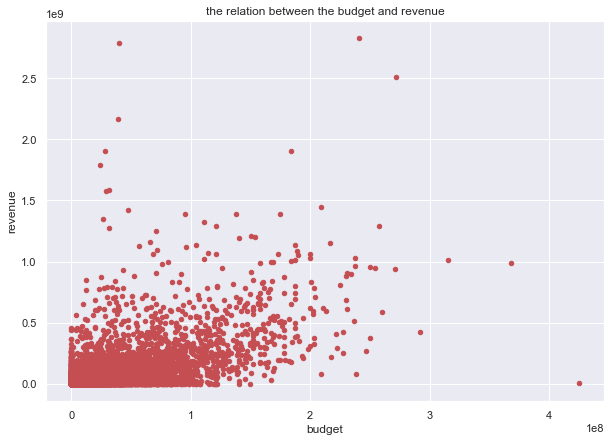

In [271]:
# plotting the relation between the budget and revenue
df_movie.plot(x='budget_adj' ,y='revenue_adj', kind='scatter', color='r',figsize=(10,7));
plt.title('the relation between the budget and revenue')
plt.xlabel('budget')
plt.ylabel('revenue');

The budget and the revenue have positive correlation

### top 30 movies according to profit

In [272]:
#top 30 movies according to profit count
profit = df_movie.sort_values('profit', ascending=False)
top_30p=profit.loc[:,['original_title','vote_count','fisrt_lead','release_year','profit','budget_adj']]
top_30p.head(30)

,original_title,vote_count,fisrt_lead,release_year,profit,budget_adj
1329,Star Wars,4428,Mark Hamill,1977,2.750137e+09,3.957559e+07
1386,Avatar,8458,Sam Worthington,2009,2.586237e+09,2.408869e+08
5231,Titanic,4654,Kate Winslet,1997,2.234714e+09,2.716921e+08
10594,The Exorcist,1113,Linda Blair,1973,2.128036e+09,3.928928e+07
9806,Jaws,1415,Roy Scheider,1975,1.878643e+09,2.836275e+07
8889,E.T. the Extra-Terrestrial,1830,Henry Thomas,1982,1.767968e+09,2.372625e+07
3,Star Wars: The Force Awakens,5292,Harrison Ford,2015,1.718723e+09,1.839999e+08
8094,The Net,201,Sandra Bullock,1995,1.551568e+09,3.148127e+07
10110,One Hundred and One Dalmatians,913,Rod Taylor,1961,1.545635e+09,2.917944e+07
7309,The Empire Strikes Back,3954,Mark Hamill,1980,1.376998e+09,4.762866e+07


In [273]:
# Exploring profit
df_movie['profit'].describe()

count    1.076700e+04
mean     3.412633e+07
std      1.257460e+08
min     -4.139124e+08
25%      0.000000e+00
50%      0.000000e+00
75%      1.364468e+07
max      2.750137e+09
Name: profit, dtype: float64

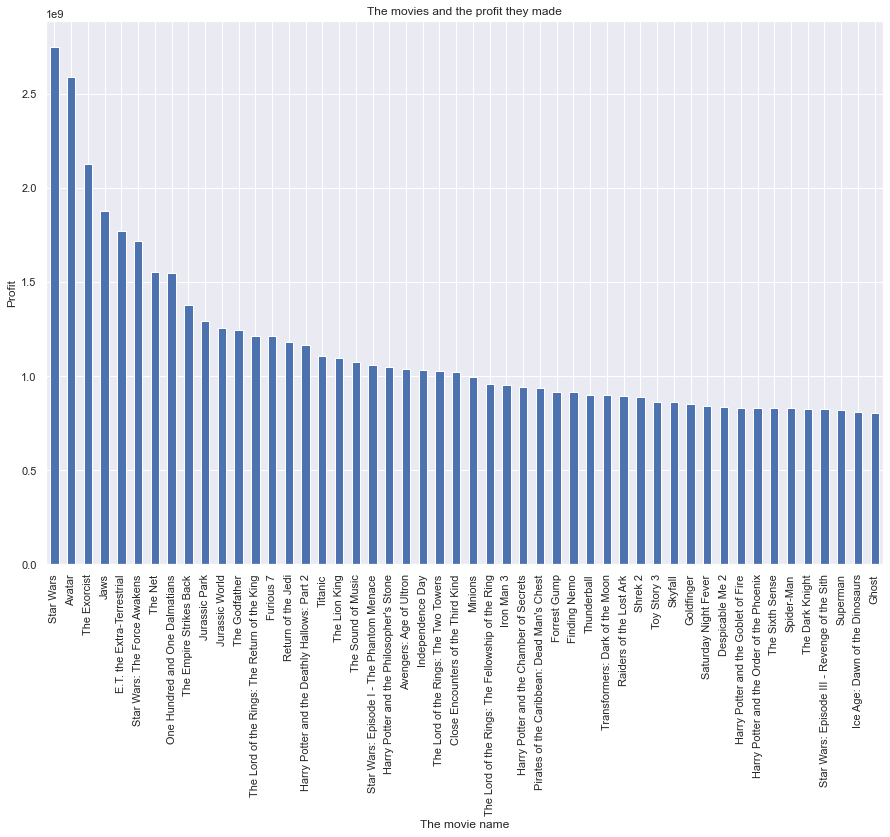

In [274]:
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby('original_title')['profit'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.title('The movies and the profit they made')
plt.xlabel('The movie name')
plt.ylabel('Profit');

The movie with the highest profit in the dataset is **star war**

### When was the time period were the highest profits were made?and does the movies budget increases in recent years ? 

In [275]:
#displayng every year and its average profit
df_pf = df_movie.groupby('release_year').profit.mean()
df_pf

release_year
1960    2.832787e+07
1961    6.861480e+07
1962    3.623546e+07
1963    2.388893e+07
1964    5.046705e+07
1965    7.669502e+07
1966    3.969746e+06
1967    1.067978e+08
1968    3.180575e+07
1969    3.999063e+07
1970    6.083370e+07
1971    3.220480e+07
1972    5.976551e+07
1973    1.034728e+08
1974    7.071519e+07
1975    8.298967e+07
1976    5.534404e+07
1977    1.297131e+08
1978    5.969460e+07
1979    7.537640e+07
1980    4.770202e+07
1981    4.096954e+07
1982    5.636968e+07
1983    4.894267e+07
1984    3.847529e+07
1985    3.955860e+07
1986    3.810119e+07
1987    4.260125e+07
1988    3.656765e+07
1989    5.322906e+07
1990    5.089185e+07
1991    3.900848e+07
1992    5.463087e+07
1993    4.388930e+07
1994    3.890628e+07
1995    5.173239e+07
1996    3.166989e+07
1997    4.199198e+07
1998    3.180858e+07
1999    3.267067e+07
2000    2.954305e+07
2001    3.969449e+07
2002    4.018814e+07
2003    3.753639e+07
2004    3.618822e+07
2005    2.837355e+07
2006    2.402123e+07


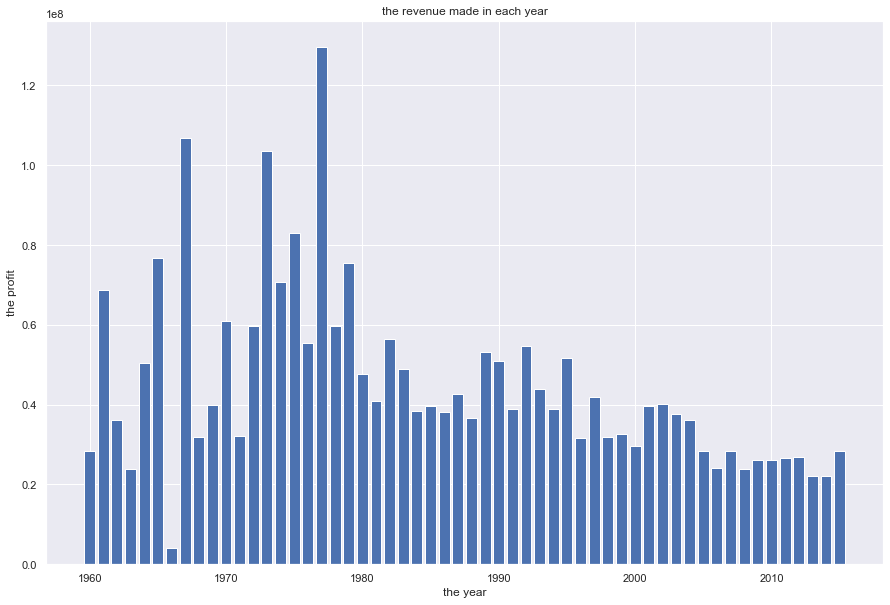

In [276]:
#plotting a bar chart between the years and profit 
plt.figure(figsize=(30 * .5, 20 * .5))
plt.bar(df_pf.index, df_pf)
plt.title('the revenue made in each year')
plt.xlabel('the year')
plt.ylabel('the profit');

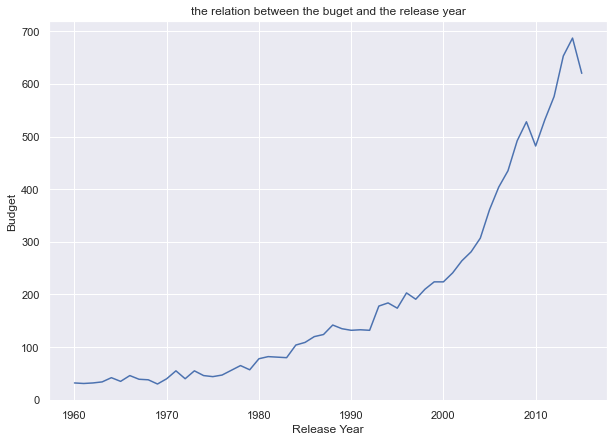

In [278]:
#exploring the relation between the buget and the release year by ploting 
df_yearbj = df_movie.groupby(['release_year'])['budget_adj'].count()
df_yearbj.plot(figsize=(10,7));
plt.title('the relation between the buget and the release year')
plt.xlabel('Release Year')
plt.ylabel('Budget');


The budget of the movies production will increase over the years

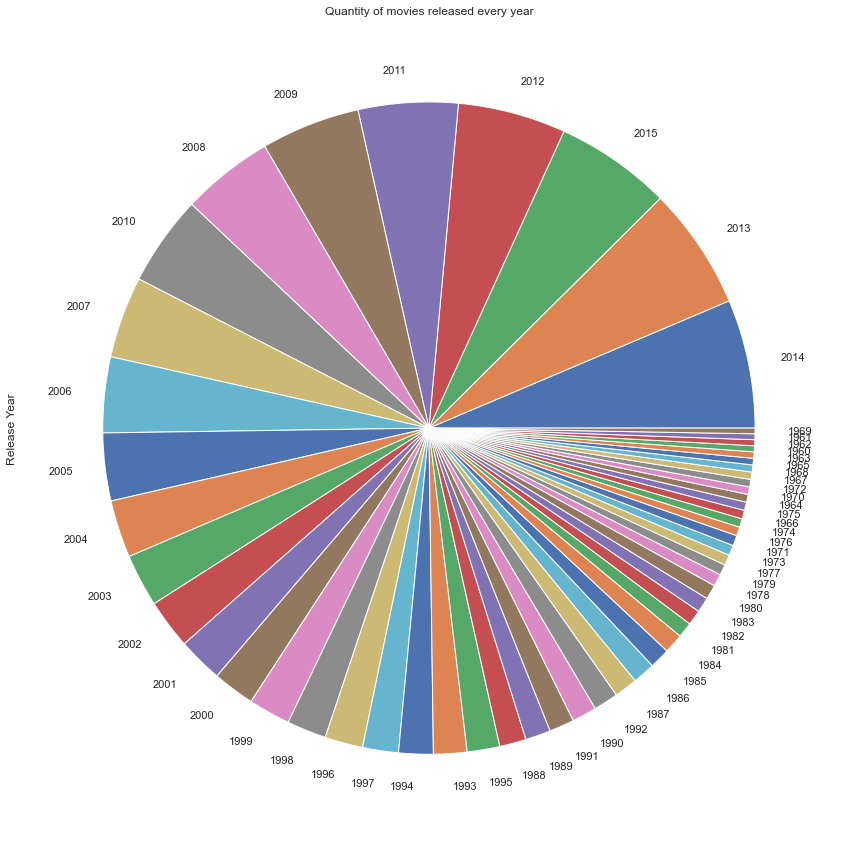

In [280]:
# Quantity of movies released every year
df_movie['release_year'].value_counts().plot(kind='pie', figsize=(15,15));
plt.title('Quantity of movies released every year')
plt.ylabel('Release Year');

The quantity of released movies have increased 

In [281]:
df_year = df_movie.query('release_year >= 2000')
df_year.head(10)

,id,budget,revenue,original_title,fisrt_lead,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,262500,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,168259,190000000,1506249360,Furious 7,Vin Diesel,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09
5,281957,135000000,532950503,The Revenant,Leonardo DiCaprio,156,Western|Drama|Adventure|Thriller,12/25/2015,3929,7.2,2015,1.241999e+08,4.903142e+08,3.661143e+08
6,87101,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger,125,Science Fiction|Action|Thriller|Adventure,6/23/2015,2598,5.8,2015,1.425999e+08,4.053551e+08,2.627551e+08
7,286217,108000000,595380321,The Martian,Matt Damon,141,Drama|Adventure|Science Fiction,9/30/2015,4572,7.6,2015,9.935996e+07,5.477497e+08,4.483897e+08
8,211672,74000000,1156730962,Minions,Sandra Bullock,91,Family|Animation|Adventure|Comedy,6/17/2015,2893,6.5,2015,6.807997e+07,1.064192e+09,9.961120e+08
9,150540,175000000,853708609,Inside Out,Amy Poehler,94,Comedy|Animation|Family,6/9/2015,3935,8.0,2015,1.609999e+08,7.854116e+08,6.244116e+08


### Exploring first leads and how many movies they participated in from the dataset? and the relation between first lead and vote count

In [282]:
# which fisrt lead hase more movies in this dataset
df_movie['fisrt_lead'].value_counts()

Nicolas Cage        50
Robert De Niro      42
Bruce Willis        39
Clint Eastwood      38
Johnny Depp         37
                    ..
Sarah Snook          1
Megumi Odaka         1
Helen McCrory        1
Robert Crumb         1
Harold P. Warren     1
Name: fisrt_lead, Length: 4291, dtype: int64

In [283]:
# unique first leads
df_movie['fisrt_lead'].unique()

array(['Chris Pratt', 'Tom Hardy', 'Shailene Woodley', ...,
       'Innokentiy Smoktunovskiy', 'Tatsuya Mihashi', 'Harold P. Warren'],
      dtype=object)

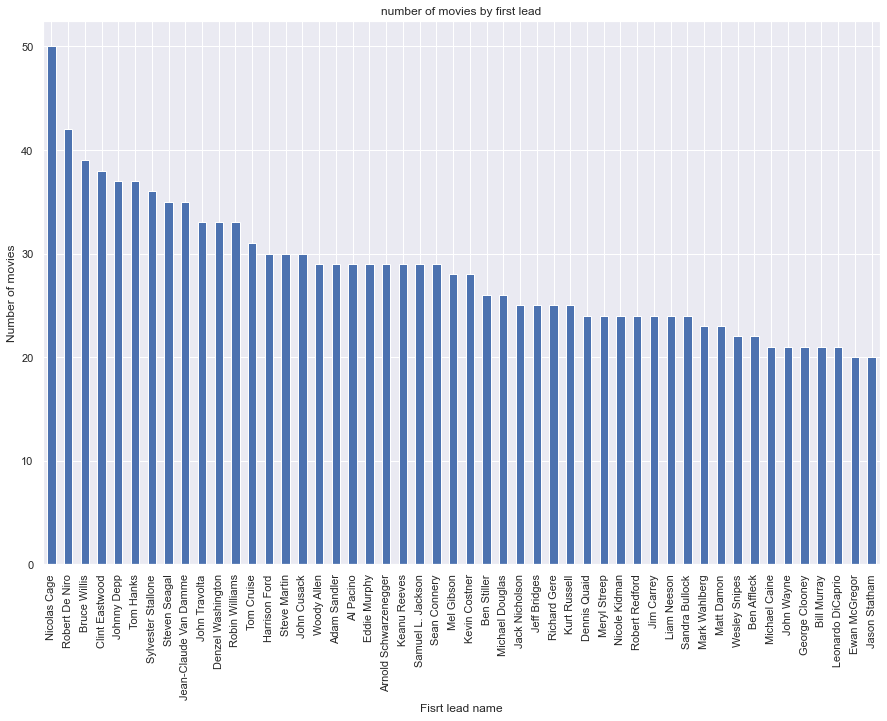

In [284]:
# plotting the fisrt leads and the number of movies they acted in 
sns.set(style="darkgrid")
plt.figure(figsize=(30 * 0.5, 20 * 0.5))
df_movie['fisrt_lead'].value_counts()[:50].plot(kind="bar")
plt.title('number of movies by first lead')
plt.xlabel('Fisrt lead name')
plt.ylabel('Number of movies');

**Nicolas Cage** acted in more movies than the others in the dataset

In [285]:
# which is the first lead hase the bigger mean in vote count 
df_movie.groupby('fisrt_lead')['vote_count'].mean().sort_values(ascending=False)

fisrt_lead
Chris Pratt           5587.0
Suraj Sharma          4338.0
Ben Burtt             4209.0
Scott Adsit           4185.0
Taron Egerton         3833.0
                       ...  
Mary-Louise Parker      10.0
Paris Warner            10.0
Pascal Langdale         10.0
Julie Walters           10.0
Don Adams               10.0
Name: vote_count, Length: 4291, dtype: float64

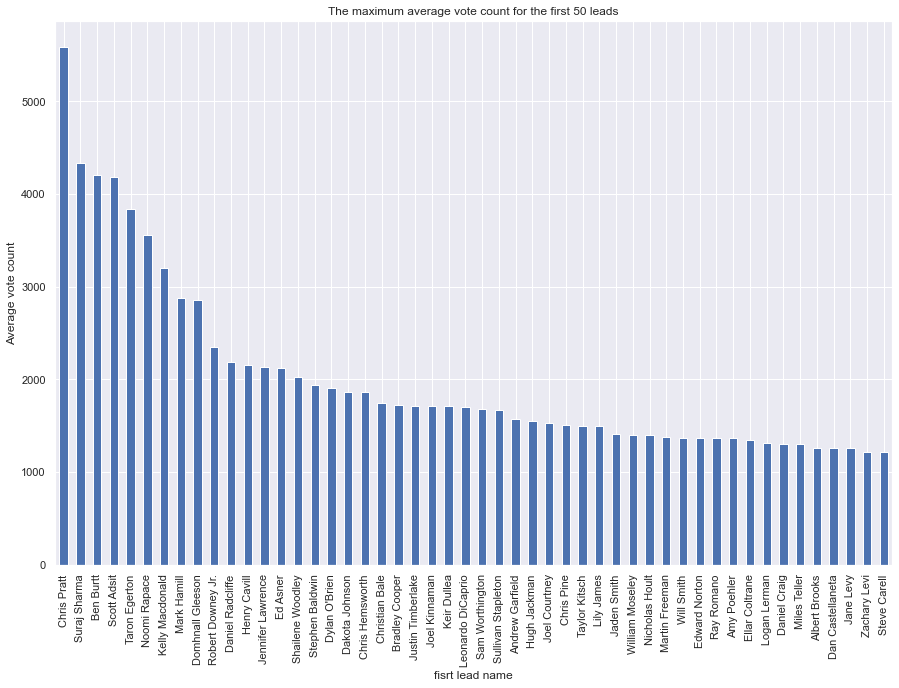

In [286]:
# plotting first leads and mean vote count
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby('fisrt_lead')['vote_count'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.title('The maximum average vote count for the first 50 leads')
plt.xlabel('fisrt lead name')
plt.ylabel('Average vote count');

**Chris Pratt** took fisrst place in this category

In [287]:
# which is the first lead hase the maximum in vote count 
df_movie.groupby('fisrt_lead')['vote_count'].max().sort_values(ascending=False)

fisrt_lead
Leonardo DiCaprio    9767
Robert Downey Jr.    8903
Sam Worthington      8458
Christian Bale       8432
Jamie Foxx           7375
                     ... 
Andy Dick              10
Gail Neely             10
Bryan Genesse          10
Angel Aquino           10
Bart Johnson           10
Name: vote_count, Length: 4291, dtype: int64

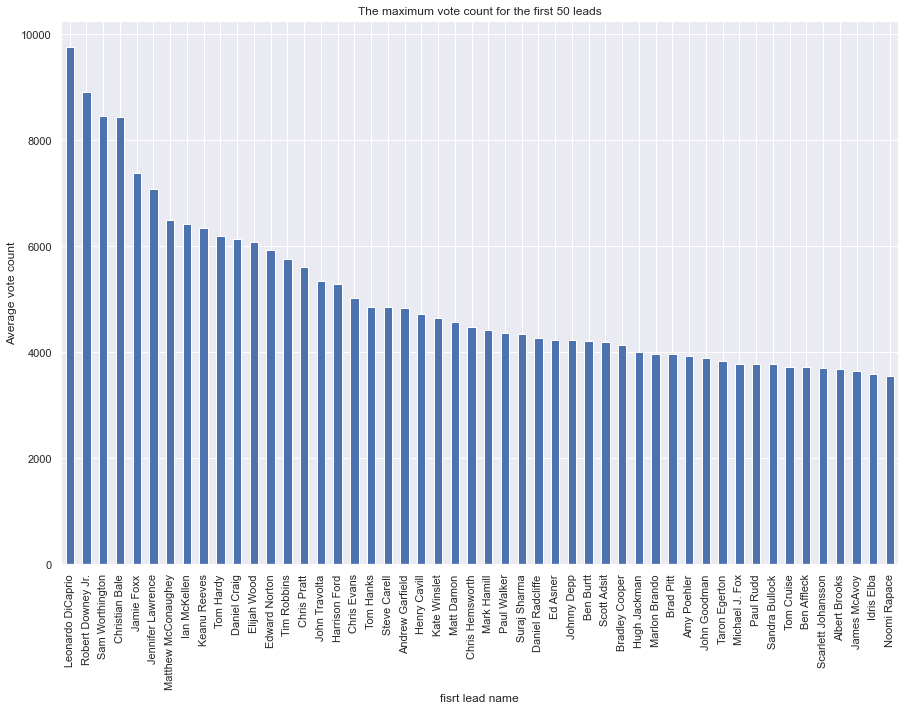

In [288]:
# plotting first leads and maximum vote count
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby('fisrt_lead')['vote_count'].max().sort_values(ascending=False)[:50].plot(kind="bar")
plt.title('The maximum vote count for the first 50 leads')
plt.xlabel('fisrt lead name')
plt.ylabel('Average vote count');

**Leonardo DiCaprio** took fisrst place in this category

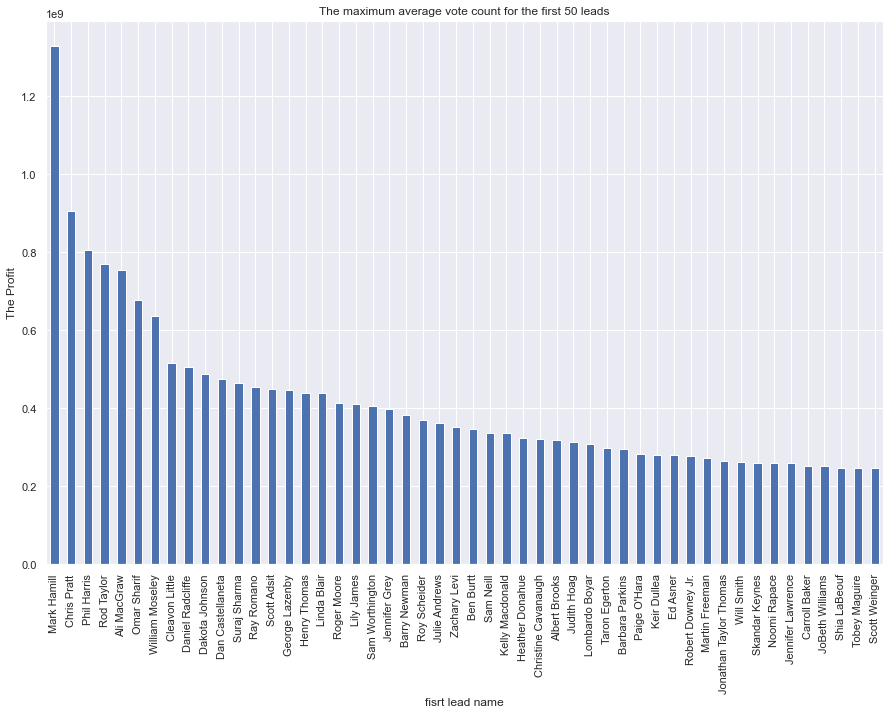

In [289]:
# plotting the first lead movies and the profit
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby('fisrt_lead')['profit'].mean().sort_values(ascending=False)[:50].plot(kind="bar")
plt.title('The maximum average vote count for the first 50 leads')
plt.xlabel('fisrt lead name')
plt.ylabel('The Profit');

**Mark Hamill** took first in this category, I believe that because of star war movies

**Exploring the first and leads their movies genres**  

In [290]:
col_name =['original_title','vote_count','profit','release_year']

In [293]:
# creating a split function 
def colle(df, col, ind):
    collection = pd.concat([pd.Series(row[col], row[ind].split('|')) for _, row in df.iterrows()]).reset_index()
    collection.columns = [ind, col]
    return collection

In [294]:
# calculating the first leads and their movies genres in this dataset using the (colle) function
genres_df = colle(df_movie, 'fisrt_lead', 'genres')
for item in col_name:
    genres_df = pd.concat([genres_df, colle(df_movie, item, 'genres')[item]], axis=1)
# Displaying the fisrt 30
genres_df.head(30)

,genres,fisrt_lead,original_title,vote_count,profit,release_year
0,Action,Chris Pratt,Jurassic World,5562,1.254446e+09,2015
1,Adventure,Chris Pratt,Jurassic World,5562,1.254446e+09,2015
2,Science Fiction,Chris Pratt,Jurassic World,5562,1.254446e+09,2015
3,Thriller,Chris Pratt,Jurassic World,5562,1.254446e+09,2015
4,Action,Tom Hardy,Mad Max: Fury Road,6185,2.101614e+08,2015
5,Adventure,Tom Hardy,Mad Max: Fury Road,6185,2.101614e+08,2015
6,Science Fiction,Tom Hardy,Mad Max: Fury Road,6185,2.101614e+08,2015
7,Thriller,Tom Hardy,Mad Max: Fury Road,6185,2.101614e+08,2015
8,Adventure,Shailene Woodley,Insurgent,2480,1.704191e+08,2015
9,Science Fiction,Shailene Woodley,Insurgent,2480,1.704191e+08,2015


### Exploring the movies genre

In [295]:
df_movie['genres'].value_counts()[:30]

Comedy                         712
Drama                          711
Drama|Romance                  289
Comedy|Drama                   280
Documentary                    278
Comedy|Romance                 268
Horror|Thriller                259
Horror                         253
Comedy|Drama|Romance           222
Drama|Thriller                 138
Comedy|Family                  102
Action|Thriller                101
Thriller                        93
Drama|Comedy                    92
Animation|Family                85
Crime|Drama|Thriller            81
Crime|Drama                     74
Comedy|Horror                   72
Drama|Comedy|Romance            64
Action                          63
Action|Comedy                   62
Drama|History                   58
Action|Crime|Drama|Thriller     54
Drama|Horror|Thriller           53
Action|Crime|Thriller           52
Horror|Science Fiction          52
Horror|Mystery|Thriller         51
Comedy|Crime                    50
Drama|Music         

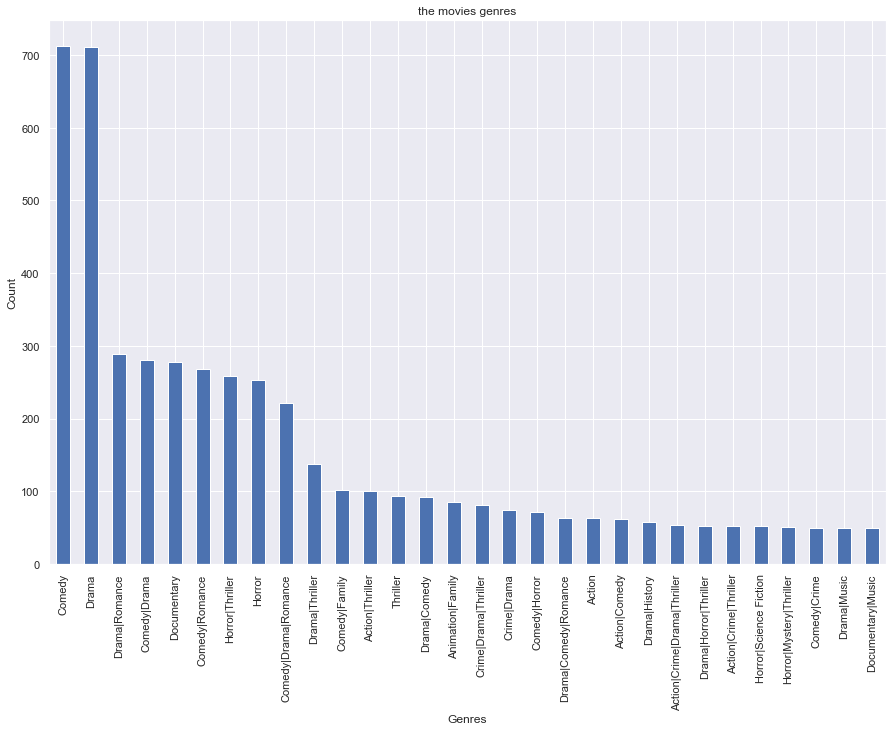

In [296]:
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie['genres'].value_counts()[:30].plot(kind="bar");
plt.title('the movies genres')
plt.xlabel('Genres')
plt.ylabel('Count');

#### Counting the movies genres in the data set 

In [297]:
genres = Counter([item for sublist in list(df_movie['genres'].str.split('|')) for item in sublist])
genres = pd.DataFrame(genres.most_common()).set_index([0], drop=True)
genres.columns = ['Count']
genres

,Count
0,
Drama,4752
Comedy,3785
Thriller,2905
Action,2381
Romance,1712
Horror,1637
Adventure,1469
Crime,1354
Science Fiction,1227


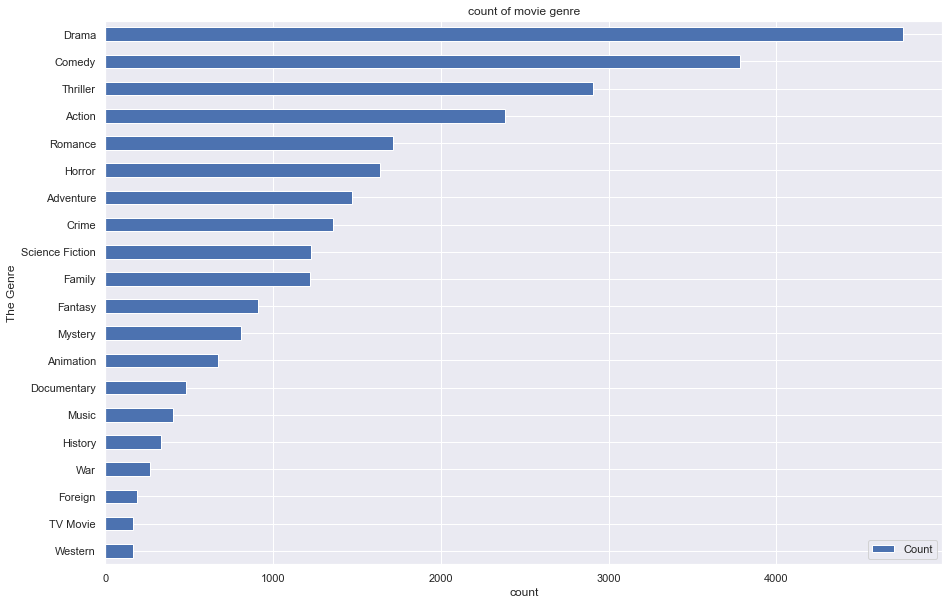

In [298]:
# plotting the Genre count 
genres.plot(kind="barh",figsize=(30 * .5, 20 * .5)).invert_yaxis()
plt.legend(loc='lower right')
plt.title('count of movie genre')
plt.xlabel('count')
plt.ylabel('The Genre');

**Drama** is the mots repeated genre in the data set 

#### Separate the Genres column and Combining it into the dataset

In [299]:
# Spletting the genres column for tow columns
sep_genres = df_movie.genres.str.split('|',expand=True).iloc[:,0:2]
sep_genres.columns=['genre_1','genre_2']
sep_genres.genre_2.fillna(sep_genres.genre_1,inplace=True)
sep_genres

,genre_1,genre_2
0,Action,Adventure
1,Action,Adventure
2,Adventure,Science Fiction
3,Action,Adventure
4,Action,Crime
...,...,...
10861,Documentary,Documentary
10862,Action,Adventure
10863,Mystery,Comedy
10864,Action,Comedy


In [300]:
# Combining the tow separated columns with the dataset
df_movie = pd.concat([df_movie,sep_genres],axis=1)
df_movie

,id,budget,revenue,original_title,fisrt_lead,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,genre_1,genre_2
0,135397,150000000,1513528810,Jurassic World,Chris Pratt,124,Action|Adventure|Science Fiction|Thriller,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action,Adventure
1,76341,150000000,378436354,Mad Max: Fury Road,Tom Hardy,120,Action|Adventure|Science Fiction|Thriller,5/13/2015,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action,Adventure
2,262500,110000000,295238201,Insurgent,Shailene Woodley,119,Adventure|Science Fiction|Thriller,3/18/2015,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Adventure,Science Fiction
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,136,Action|Adventure|Science Fiction|Fantasy,12/15/2015,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Action,Adventure
4,168259,190000000,1506249360,Furious 7,Vin Diesel,137,Action|Crime|Thriller,4/1/2015,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Action,Crime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0,0,The Endless Summer,Michael Hynson,95,Documentary,6/15/1966,11,7.4,1966,0.000000e+00,0.000000e+00,0.000000e+00,Documentary,Documentary
10862,20379,0,0,Grand Prix,James Garner,176,Action|Adventure|Drama,12/21/1966,20,5.7,1966,0.000000e+00,0.000000e+00,0.000000e+00,Action,Adventure
10863,39768,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy,94,Mystery|Comedy,1/1/1966,11,6.5,1966,0.000000e+00,0.000000e+00,0.000000e+00,Mystery,Comedy
10864,21449,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi,80,Action|Comedy,11/2/1966,22,5.4,1966,0.000000e+00,0.000000e+00,0.000000e+00,Action,Comedy


In [301]:
# the highest two genres in profits
df_movie.groupby(['genre_1','genre_2']).profit.max().sort_values(ascending=False).head(10)

genre_1          genre_2        
Adventure        Action             2.750137e+09
Action           Adventure          2.586237e+09
Drama            Romance            2.234714e+09
                 Horror             2.128036e+09
Horror           Thriller           1.878643e+09
Science Fiction  Adventure          1.767968e+09
Crime            Drama              1.551568e+09
Adventure        Animation          1.545635e+09
Family           Animation          1.319404e+09
Adventure        Science Fiction    1.293767e+09
Name: profit, dtype: float64

In [302]:
# the highest genres in profits
df_movie.groupby(['genre_1']).profit.max().sort_values(ascending=False).head(10)

genre_1
Adventure          2.750137e+09
Action             2.586237e+09
Drama              2.234714e+09
Horror             1.878643e+09
Science Fiction    1.767968e+09
Crime              1.551568e+09
Family             1.319404e+09
Animation          1.052306e+09
Comedy             9.164222e+08
Mystery            8.283769e+08
Name: profit, dtype: float64

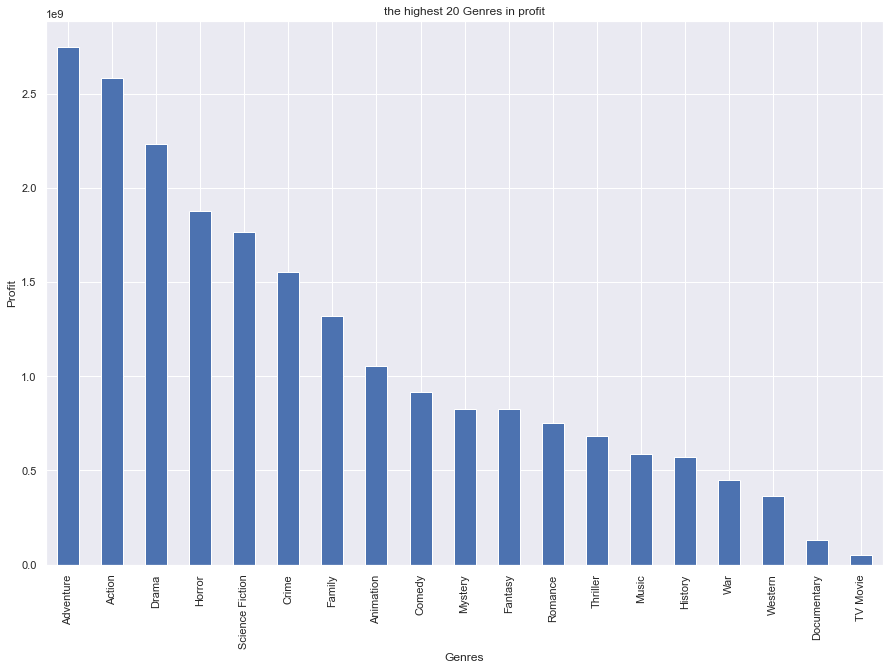

In [303]:
# Plotting the highest genres in profits
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby(['genre_1']).profit.max().sort_values(ascending=False)[:19].plot(kind="bar")
plt.title('the highest 20 Genres in profit')
plt.xlabel('Genres')
plt.ylabel('Profit');

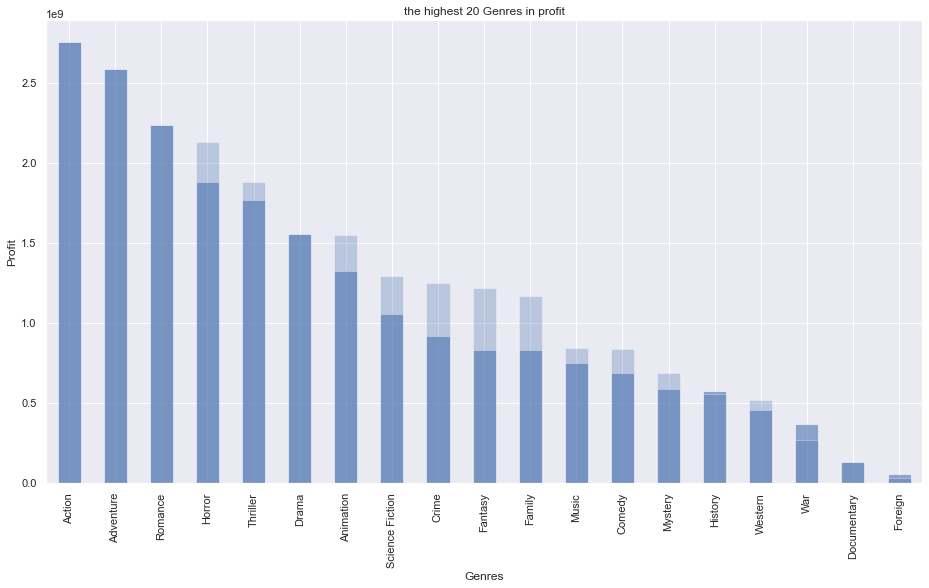

In [304]:
# the highest tow genres in profits
plt.figure(figsize=[15.70, 8.50])
df_movie.groupby(['genre_1']).profit.max().sort_values(ascending=False)[:19].plot(alpha =.6, label= 'genre 1', kind="bar")
df_movie.groupby(['genre_2']).profit.max().sort_values(ascending=False)[:19].plot(alpha =.3, label= 'genre 2', kind="bar")
plt.title('the highest 20 Genres in profit')
plt.xlabel('Genres')
plt.ylabel('Profit');

In [305]:
# the highest genres in vote count
df_movie.groupby(['genre_1']).vote_count.max().sort_values(ascending=False).head(10)

genre_1
Action             9767
Science Fiction    8903
Drama              8432
Adventure          6498
Thriller           5343
Comedy             4856
Animation          4225
Crime              4027
Western            3929
Fantasy            3899
Name: vote_count, dtype: int64

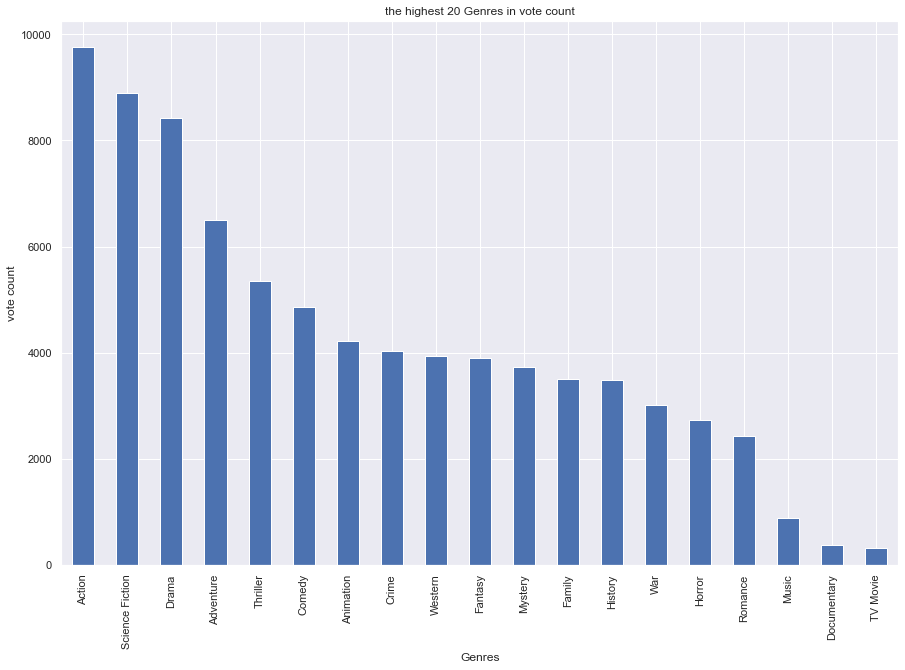

In [306]:
# Plotting the highest genres in vote count
plt.figure(figsize=(30 * .5, 20 * .5))
df_movie.groupby(['genre_1']).vote_count.max().sort_values(ascending=False)[:19].plot(kind="bar")
plt.title('the highest 20 Genres in vote count')
plt.xlabel('Genres')
plt.ylabel('vote count');

The highest genres in vote count is **Action**

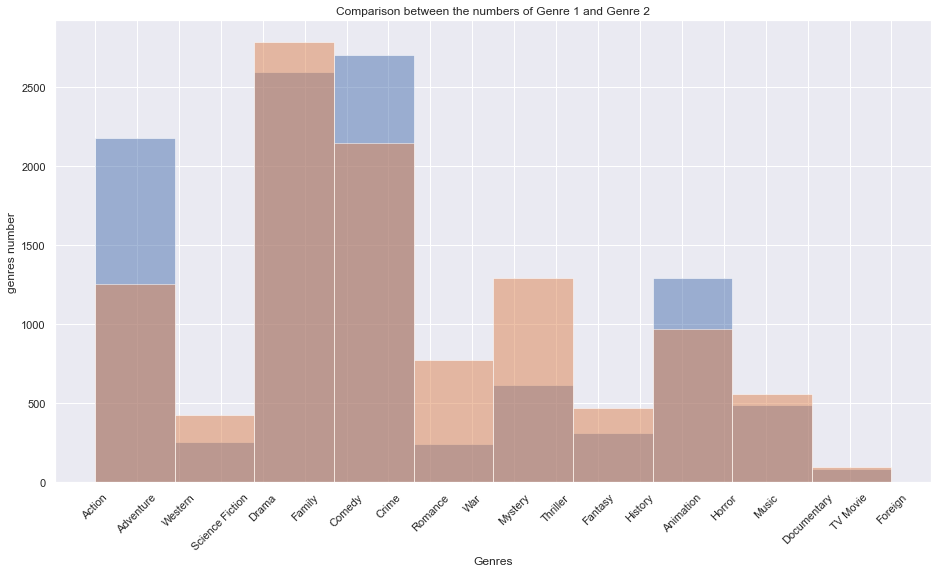

In [307]:
#Comparison between the numbers of Genre 1 and Genre 2
plt.figure(figsize=[15.70, 8.50])
df_movie['genre_1'].hist(alpha =.5, label= 'genre 1')
df_movie['genre_2'].hist(alpha =.5, label= 'genre 2')
plt.title('Comparison between the numbers of Genre 1 and Genre 2')
plt.xlabel('Genres')
plt.ylabel('genres number')
plt.xticks(rotation=45);

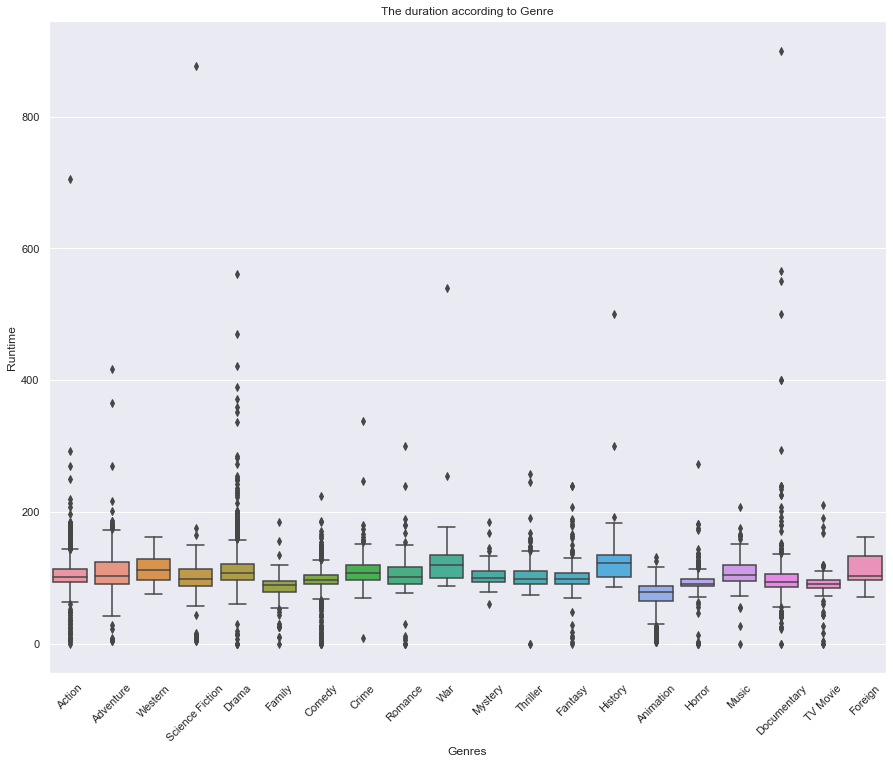

In [308]:
#The duration of every movie according to its Genre
plt.figure(figsize=(15, 12))
sns.boxplot(x="genre_1", y="runtime", data=df_movie)
plt.xticks(rotation=45)
plt.title('The duration according to Genre')
plt.xlabel('Genres')
plt.ylabel('Runtime');

The genres which have the longest run time is **Drama and Documentary**  

<a id='conclusions'></a>
## Conclusions

> **Are movies with higher vote count have higher profit? And what movie have the highest vote count in the dataset?**\
Yes, the vote count and the profit have positive correlation that means the increase in vote count the movie will have a higher chance of collecting higher profit and the movie with the highest vote count in the dataset is Inception

> **Does the budget of the movie affect its revenue and vote count? And what movie have the highest profit in the dataset?**\
Yes, the movies with higher budget get higher vote count and higher revenue, and when we calculated the top 30 movies according to profit, we found that movies with high profit also have high vote count and high budget and the movie with the highest profit in the dataset is star war
I used budget_adj and revenue_adj because on Kaggle they subjected to better use the adjusted value because it was adjusted after the inflation   

> **When was the time period were the highest profits were made?** \
The period with the highest revenue in this dataset from 1973 to 1978, **does the movies budget increases in recent years?**  yes, the budget of the movies production increases over the years due to the technological advances and the audience having a higher expectation of movies in visuals and special effects and I noticed that **the quantity of released movies** have also increased in the recent years comparing to the early years and part of it because of the technology whether it’s in the industry of movie production or the evolution of the internet and video/audio communications  

> **Exploring first leads and how many movies they participated in from the dataset? and the relation between first lead and vote count**\
Nicolas Cage acted in more movies than the others in the dataset\
and Chris Pratt has the maximum average vote I think it’s because his movies the Guardian of The Galaxy, Avengers and Jurassic world\
while Leonardo DiCaprio have the maximum vote count, I think because his movie inception\
and the first lead movie which have the highest profit is Mark Hamill, I believe that because of star war movie

> **Exploring the movies genre**\
Drama is the most repeated genre in the data set \
the highest two genres in profits are Adventure then Action\
and the highest genres in vote count is Action\
the genres which have the longest run time is Drama and Documentary  



### Limitations
> Some values of the budget and revenue were zeroes not missing, I used the total vote count in my calculation because this dataset doesn’t have the imdb score which would have been more accurate, I tried using the average vote count but it was far from accurate, and I don’t have the movies rank in the box office in their first week or the viewing rating which would made more detailed analysis in the correlation of the profit , and there was some missing data I couldn't fill like the cast and the genres so i drped them, and the revenue column didn’t specify whether the amount was national or international  
